In [70]:
# BASIC TOOLS
import numpy as np
import pandas as pd
import datetime as dt

# STATISTIC TOOLS
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import pingouin as pg 
import statsmodels.formula.api as smf
from lifelines import KaplanMeierFitter, NelsonAalenFitter, CoxPHFitter

# PRE - PROCESSING TOOLS 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# SUPERVISED LEARNING TOOLS
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# UNSUPERVISED LEARNING TOOLS
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA, NMF

# DEEP LEARNING TOOLS 
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [71]:
xls = pd.ExcelFile('C:\\Users\\USER\\Downloads\\top_Record_form_2.xlsx')


In [72]:
print(xls.sheet_names)

['Sheet1', 'Sheet2', 'Sheet3']


In [73]:
df = xls.parse('Sheet3')
df

,patient ID,Intervention group,Time (hr),Pain score,OP (ml),Age
0,1,B,6,6,3.0,80
1,1,B,12,8,7.0,80
2,1,B,24,5,11.7,80
3,1,B,48,3,20.0,80
4,1,B,72,1,24.7,80
...,...,...,...,...,...,...
135,28,A,6,5,9.0,67
136,28,A,12,5,14.0,67
137,28,A,24,5,21.0,67
138,28,A,48,3,28.0,67


In [74]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient ID          140 non-null    int64  
 1   Intervention group  140 non-null    object 
 2   Time (hr)           140 non-null    int64  
 3   Pain score          140 non-null    int64  
 4   OP (ml)             140 non-null    float64
 5   Age                 140 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 6.7+ KB


patient ID            0
Intervention group    0
Time (hr)             0
Pain score            0
OP (ml)               0
Age                   0
dtype: int64

<AxesSubplot: xlabel='Intervention group', ylabel='Age'>

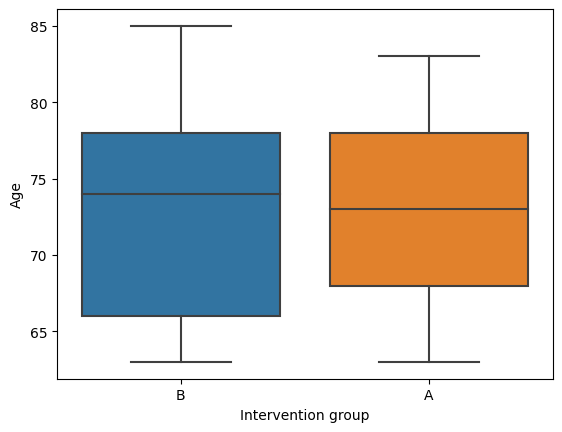

In [75]:
sns.boxplot(data = df, x = 'Intervention group', y = 'Age', whis = [0,100])

In [76]:
df.groupby('Intervention group')['Age'].median()

Intervention group
A    73.0
B    74.0
Name: Age, dtype: float64

In [77]:
compare_age = pg.mwu(df[df['Intervention group'] == 'A']['Age'], df[df['Intervention group'] == 'B']['Age'], alternative = 'two-sided')
compare_age

,U-val,alternative,p-val,RBC,CLES
MWU,2475.0,two-sided,0.918501,-0.010204,0.505102


We conducted a mann-whitney u test to compare the mean ages of participants in Group A and Group B.
The summary statistics and test results are as follows:
- Group A: Median Age = 73.0 years
- Group B: Median Age = 74.0 years
- p-value: 0.918501
In summary, there is no significant difference in the age baseline characteristic between Group A and Group B based on the given data.

In [78]:
df = df.rename(columns = {'Time (hr)':'hour', 'Intervention group':'group', 'patient ID':'patient', 'Pain score':'painscore', 'OP (ml)':'OP'})

In [79]:
formula = 'painscore ~ hour + Age + group + (1 | patient)'
lmm = smf.mixedlm(formula, df, groups=df['patient']).fit()
print(lmm.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: painscore
No. Observations: 140     Method:             REML     
No. Groups:       28      Scale:              0.6408   
Min. group size:  5       Log-Likelihood:     -193.7429
Max. group size:  5       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    3.626    2.068   1.753 0.080 -0.427  7.678
group[T.B]  -0.744    0.528  -1.411 0.158 -1.778  0.290
hour        -0.044    0.003 -16.099 0.000 -0.050 -0.039
Age          0.028    0.022   1.240 0.215 -0.016  0.071
1 | patient -0.031    0.033  -0.921 0.357 -0.096  0.035
Group Var    0.292    0.167                            



## Conclusion
### Outcome Measure: The primary outcome measure was pain score, assessed at multiple time points (hours).
Effectiveness Over Time: There is a significant reduction in pain scores over time (hour), suggesting that as time progresses, patients' pain scores decrease significantly.(p-value < 0.000)

Group Comparison: While group B shows a trend towards lower pain scores compared to group A, this difference is not statistically significant, meaning we cannot conclusively state that group B is more effective than group A based on the current data.(p-value 0.158)

Age Adjustment: Age does not appear to have a significant effect on pain scores, indicating that the observed differences in pain scores over time and between groups are not confounded by the age of the patients.(p-value 0.215)

C:\Users\USER\AppData\Local\Temp\ipykernel_7184\3007090655.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='painscore', hue='group', markers=True, ci=None, palette='Set1')


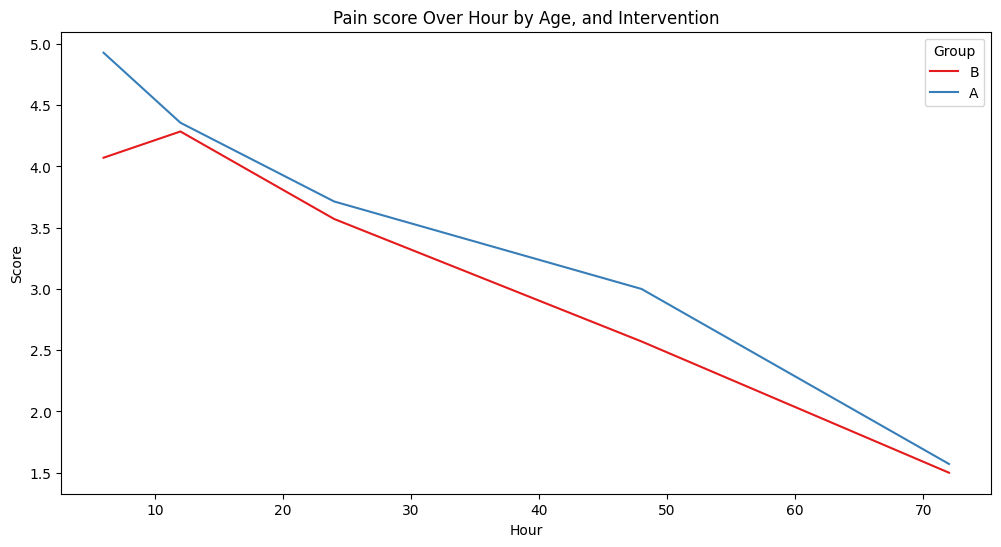

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='painscore', hue='group', markers=True, ci=None, palette='Set1')
plt.title('Pain score Over Hour by Age, and Intervention')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.legend(title='Group')
plt.show()

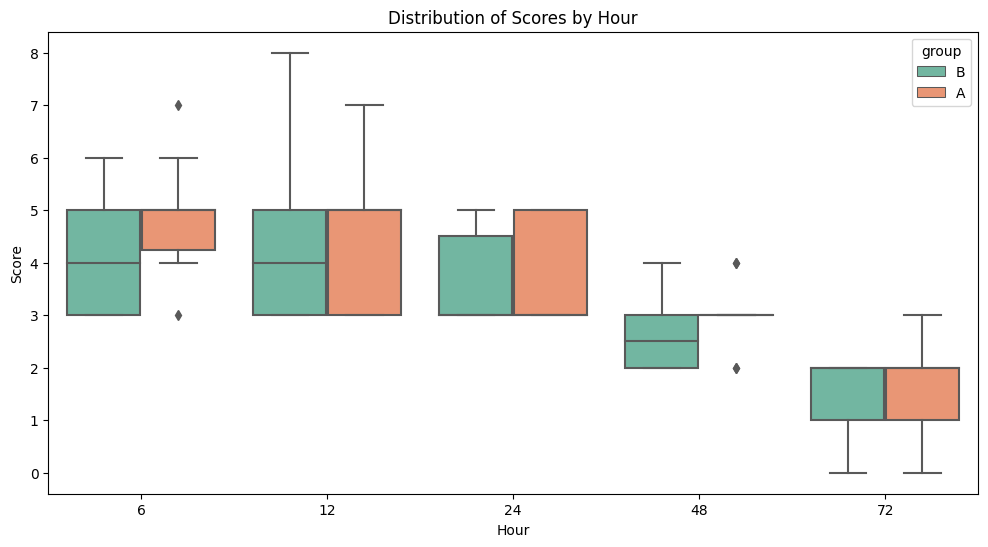

In [81]:
# Box plots for scores by intervention group at each time point
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='painscore', hue='group', palette='Set2')
plt.title('Distribution of Scores by Hour')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

In [82]:
formula = 'OP ~ hour + Age + group + (1 | patient)'
lmm = smf.mixedlm(formula, df, groups=df['patient']).fit()
print(lmm.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: OP       
No. Observations: 140     Method:             REML     
No. Groups:       28      Scale:              22.1244  
Min. group size:  5       Log-Likelihood:     -439.3317
Max. group size:  5       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------
Intercept   39.660   15.937  2.489 0.013   8.423 70.896
group[T.B]  -2.790    4.067 -0.686 0.493 -10.762  5.182
hour         0.257    0.016 15.809 0.000   0.225  0.289
Age         -0.372    0.171 -2.173 0.030  -0.707 -0.036
1 | patient -0.236    0.257 -0.917 0.359  -0.740  0.268
Group Var   20.547    1.690                            



## Conclusion:
### Outcome Measure: The Secondary outcome measure was opioid use (ml), assessed at multiple time points (hours).

- Opioid Use Trends: There is a significant baseline level of opioid use, with a noticeable hourly increase.(p-value <0.000)

- Group Comparison: There is no statistically significant difference in opioid use between Group A and Group B, 
suggesting that the interventions associated with these groups do not significantly influence opioid use under the current study conditions.(p-value 0.493)

- Age Effect: Older patients tend to have lower opioid use, indicating a potential protective effect of age against opioid consumption.(p-value 0.03)

C:\Users\USER\AppData\Local\Temp\ipykernel_7184\2130351722.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hour', y='OP', hue='group', markers=True, ci=None, palette='Set1')


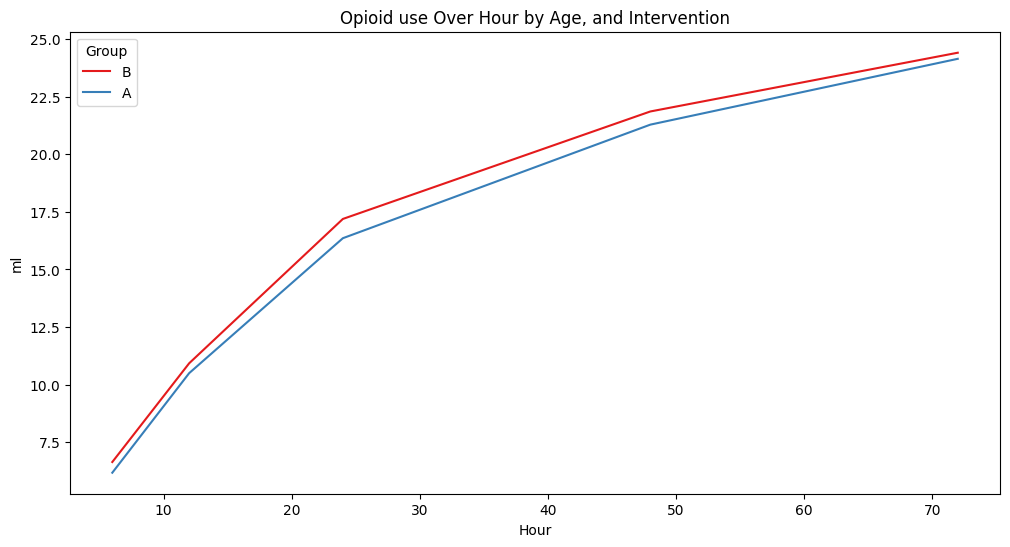

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='OP', hue='group', markers=True, ci=None, palette='Set1')
plt.title('Opioid use Over Hour by Age, and Intervention')
plt.xlabel('Hour')
plt.ylabel('ml')
plt.legend(title='Group')
plt.show()

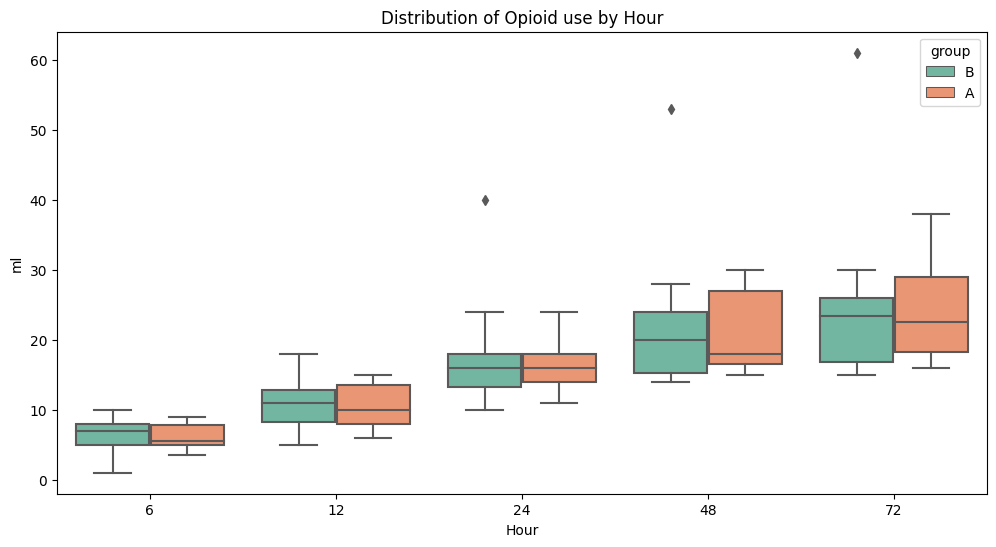

In [84]:
# Box plots for scores by intervention group at each time point
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='OP', hue='group', palette='Set2')
plt.title('Distribution of Opioid use by Hour')
plt.xlabel('Hour')
plt.ylabel('ml')
plt.show()

### SUBGROUP ANALYSIS

In [85]:
df

,patient,group,hour,painscore,OP,Age
0,1,B,6,6,3.0,80
1,1,B,12,8,7.0,80
2,1,B,24,5,11.7,80
3,1,B,48,3,20.0,80
4,1,B,72,1,24.7,80
...,...,...,...,...,...,...
135,28,A,6,5,9.0,67
136,28,A,12,5,14.0,67
137,28,A,24,5,21.0,67
138,28,A,48,3,28.0,67


PAIN SCORE

In [86]:
df.groupby(['group', 'hour'])['painscore'].median().unstack()

hour,6,12,24,48,72
group,,,,,
A,5.0,5.0,3.0,3.0,2.0
B,4.0,4.0,3.0,2.5,2.0


In [87]:
# 6 hr
six = df[df['hour'] == 6]
six_ps = pg.mwu(six[six['group'] == 'A']['painscore'], six[six['group'] == 'B']['painscore'], alternative = 'two-sided')
six_ps

,U-val,alternative,p-val,RBC,CLES
MWU,138.5,two-sided,0.052684,-0.413265,0.706633


In [88]:
# 12 hr
twelve = df[df['hour'] == 12]
twelve_ps = pg.mwu(twelve[twelve['group'] == 'A']['painscore'], twelve[twelve['group'] == 'B']['painscore'], alternative = 'two-sided')
twelve_ps

,U-val,alternative,p-val,RBC,CLES
MWU,103.5,two-sided,0.809061,-0.056122,0.528061


In [89]:
# 24 hr
twentyfour = df[df['hour'] == 24]
twentyfour_ps = pg.mwu(twentyfour[twentyfour['group'] == 'A']['painscore'], twentyfour[twentyfour['group'] == 'B']['painscore'], alternative = 'two-sided')
twentyfour_ps

,U-val,alternative,p-val,RBC,CLES
MWU,105.0,two-sided,0.712145,-0.071429,0.535714


In [90]:
# 48 hr
fourtyeight = df[df['hour'] == 48]
fourtyeight_ps = pg.mwu(fourtyeight[fourtyeight['group'] == 'A']['painscore'], fourtyeight[fourtyeight['group'] == 'B']['painscore'], alternative = 'two-sided')
fourtyeight_ps

,U-val,alternative,p-val,RBC,CLES
MWU,134.0,two-sided,0.064755,-0.367347,0.683673


In [91]:
# 72 hr
seventytwo = df[df['hour'] == 72]
seventytwo_ps = pg.mwu(seventytwo[seventytwo['group'] == 'A']['painscore'], seventytwo[seventytwo['group'] == 'B']['painscore'], alternative = 'two-sided')
seventytwo_ps

,U-val,alternative,p-val,RBC,CLES
MWU,105.5,two-sided,0.717421,-0.076531,0.538265


OPIOID USE 

In [92]:
df.groupby(['group', 'hour'])['OP'].median().unstack()

hour,6,12,24,48,72
group,,,,,
A,5.5,10.0,16.0,18.0,22.50
B,7.0,11.0,16.0,20.0,23.35


In [93]:
# 6 hr
six_op = pg.mwu(six[six['group'] == 'A']['OP'], six[six['group'] == 'B']['OP'], alternative = 'two-sided')
six_op

,U-val,alternative,p-val,RBC,CLES
MWU,81.0,two-sided,0.436516,0.173469,0.413265


In [94]:
# 12 hr
twelve_op = pg.mwu(twelve[twelve['group'] == 'A']['OP'], twelve[twelve['group'] == 'B']['OP'], alternative = 'two-sided')
twelve_op

,U-val,alternative,p-val,RBC,CLES
MWU,93.0,two-sided,0.834579,0.05102,0.47449


In [95]:
# 24 hr
twentyfour_op = pg.mwu(twentyfour[twentyfour['group'] == 'A']['OP'], twentyfour[twentyfour['group'] == 'B']['OP'], alternative = 'two-sided')
twentyfour_op

,U-val,alternative,p-val,RBC,CLES
MWU,104.0,two-sided,0.797958,-0.061224,0.530612


In [96]:
# 48 hr
fourtyeight_op = pg.mwu(fourtyeight[fourtyeight['group'] == 'A']['OP'], fourtyeight[fourtyeight['group'] == 'B']['OP'], alternative = 'two-sided')
fourtyeight_op

,U-val,alternative,p-val,RBC,CLES
MWU,109.5,two-sided,0.610661,-0.117347,0.558673


In [97]:
# 72 hr 
seventytwo_op = pg.mwu(seventytwo[seventytwo['group'] == 'A']['OP'], seventytwo[seventytwo['group'] == 'B']['OP'], alternative = 'two-sided')
seventytwo_op

,U-val,alternative,p-val,RBC,CLES
MWU,108.0,two-sided,0.661776,-0.102041,0.55102


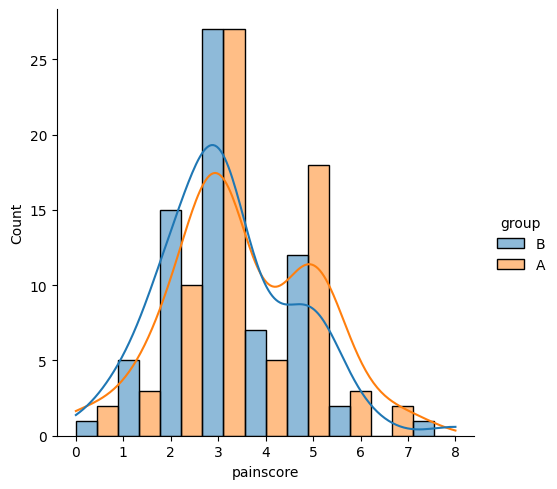

In [98]:
sns.displot(data = df, x = 'painscore', hue = 'group', kind = 'hist', kde = True, fill = True, multiple = 'dodge', alpha = 0.5)
plt.show()

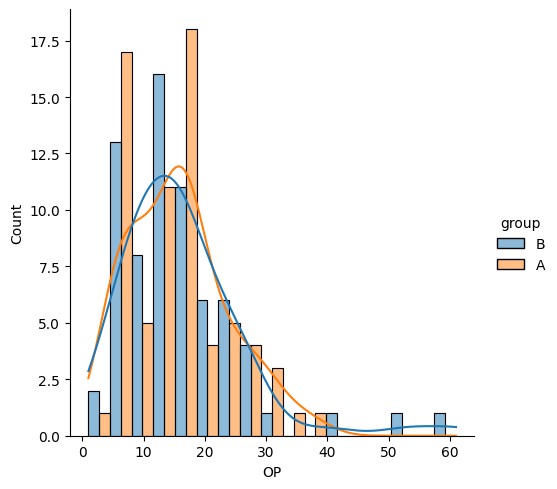

In [99]:
sns.displot(data = df, x = 'OP', hue = 'group', kind = 'hist', kde = True, fill = True, multiple = 'dodge', alpha = 0.5)
plt.show()

# Compare secondary outcome and adverse events

In [100]:
xls_final = pd.ExcelFile('C:\\Users\\USER\\Downloads\\top_Record_form_final_edit.xlsx')
print(xls_final.sheet_names)
final = xls_final.parse('Sheet5')
final


['Sheet1', 'Sheet2', 'Sheet3', 'Sheet5']


,Intervention group,time to ambulate,complication,length of stay
0,B,48,1,12
1,B,48,0,5
2,B,48,0,5
3,B,72,0,8
4,B,72,0,8
5,B,48,0,5
6,B,48,0,5
7,B,48,0,5
8,B,48,0,10
9,B,48,0,5


In [107]:
# ambulate time

ambulate_time = final.groupby('Intervention group')['time to ambulate'].describe()
print(ambulate_time)
ambulate_stat = pg.wilcoxon(x = final[final['Intervention group'] == 'A']['time to ambulate'], y = final[final['Intervention group'] == 'B']['time to ambulate'], alternative = 'two-sided')
print(ambulate_stat)

                    count       mean        std   min   25%   50%   75%   max
Intervention group                                                           
A                    14.0  58.285714  15.508948  48.0  48.0  48.0  72.0  96.0
B                    14.0  54.857143  11.251374  48.0  48.0  48.0  66.0  72.0
          W-val alternative     p-val  RBC      CLES
Wilcoxon    1.5   two-sided  0.586214  0.5  0.545918


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:3351: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [115]:
# complication

complication = final.groupby('Intervention group')['complication'].value_counts().unstack()
print(complication)

complication_ratio = final.groupby('Intervention group')['complication'].value_counts(normalize = True).unstack()
print(complication_ratio)

expected, observed, stats = pg.chi2_independence(data = final, x = 'Intervention group', y = 'complication')
print(stats[0:1])

complication         0  1
Intervention group       
A                   13  1
B                   13  1
complication               0         1
Intervention group                    
A                   0.928571  0.071429
B                   0.928571  0.071429
      test  lambda  chi2  dof  pval  cramer  power
0  pearson     1.0   0.0  1.0   1.0     0.0   0.05


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))


In [117]:
# lenght of stay 

lenght = final.groupby('Intervention group')['length of stay'].describe()
print(lenght)

lenght_stat = pg.wilcoxon(x = final[final['Intervention group'] == 'A']['length of stay'], y = final[final['Intervention group'] == 'B']['length of stay'], alternative = 'two-sided')
print(lenght_stat)

                    count      mean       std  min  25%  50%  75%   max
Intervention group                                                     
A                    14.0  7.428571  4.237457  5.0  5.0  6.0  8.0  21.0
B                    14.0  6.714286  2.334641  5.0  5.0  5.0  8.0  12.0
          W-val alternative     p-val       RBC      CLES
Wilcoxon    9.0   two-sided  0.832107  0.142857  0.517857


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:3351: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
